# Machine Learning : Model Fit

# Load the packages

In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import matplotlib

# gradient boosting for regression in scikit-learn
from numpy import mean
from numpy import std
#from sklearn.datasets import make_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error

from sklearn.datasets import make_classification
#from sklearn.experimental import enable_hist_gradient_boosting
#from lightgbm import LGBMClassifier

from tensorflow import keras
from tensorflow.keras import models, layers

#from keras.models import Sequential
#from keras.layers import Dense
#from keras.callbacks import ModelCheckpoint
#from keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

import seaborn as sn

# Read the data and set the training and test set

In [2]:
#Read the data
import pickle
 
X, y = pickle.load( open( "cluster-mldata.plk", "rb" ) )

In [3]:
X.shape

(2134, 2)

In [4]:
y.dtype

dtype('int64')

In [5]:
X.dtype

dtype('float64')

In [6]:
y.shape

(2134,)

# Train data set

In [7]:
# Fix the seed
seed=0
np.random.seed(seed)
tf.random.set_seed(3)

In [8]:
#Set the traing and test set
X_train, X_test, y_train0, y_test0 = train_test_split(X, y, test_size=0.3, random_state=seed)

In [9]:
y_train = to_categorical(y_train0, num_classes=2)
y_test  = to_categorical(y_test0, num_classes=2)

In [10]:
y_train

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [11]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

# Model: MLP
# Simple Fit using the whole train sample

In [12]:
# Set the model 
model = models.Sequential()

model.add(layers.Dense(64,input_dim=2,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(2,activation='softmax'))

#Compile and Fit the model
#model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [13]:
# Save the model
# Set the folder for saving the model
MODEL_DIR = './model'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"


#from tensorflow import keras
#callbacks = [
#             keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3),
#             keras.callbacks.ModelCheckpoint(filepath=modelpath,
#                                             monitor='val_accuracy', save_best_only=True)]

history = model.fit(X_train, y_train, 
                    epochs=100,
                    batch_size=200,
                    validation_split =0.2)
#                   callbacks=callbacks)


Epoch 1/100
6/6 [==============================] - 0s 24ms/step - loss: 0.7303 - accuracy: 0.3568 - val_loss: 0.6860 - val_accuracy: 0.4783
Epoch 2/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6635 - accuracy: 0.6365 - val_loss: 0.6381 - val_accuracy: 0.7258
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6144 - accuracy: 0.7714 - val_loss: 0.6009 - val_accuracy: 0.7358
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 0.5735 - accuracy: 0.7831 - val_loss: 0.5705 - val_accuracy: 0.7458
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 0.5382 - accuracy: 0.7789 - val_loss: 0.5456 - val_accuracy: 0.7492
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 0.5089 - accuracy: 0.7789 - val_loss: 0.5267 - val_accuracy: 0.7492
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 0.4873 - accuracy: 0.7789 - val_loss: 0.5151 - val_accuracy: 0.7458
Epoch 8/100
6/6 [=========

In [14]:
#%print("\n Accuracy: %.4f" %  model.evaluate(X_test,y_test)[1])
test_loss, test_acc = model.evaluate(X_test, y_test)

21/21 [==============================] - 0s 739us/step - loss: 0.3877 - accuracy: 0.8112


In [15]:
# Train and Test set error
def history_chart(history):
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('epoch')
    plt.ylabel('acc')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()

    plt.show()

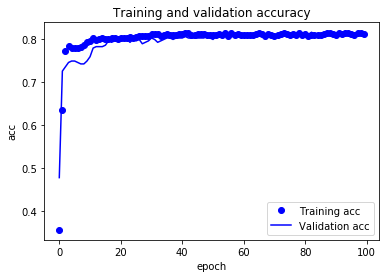

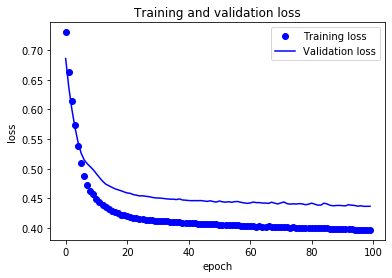

In [16]:
history_chart(history)

In [17]:
model.predict(X_test[[0]])

array([[0.06491107, 0.93508893]], dtype=float32)

In [18]:
model.predict(X_test[0:10])

array([[0.06491107, 0.93508893],
       [0.02479957, 0.9752005 ],
       [0.14842205, 0.85157794],
       [0.33546034, 0.6645397 ],
       [0.35538796, 0.644612  ],
       [0.04051627, 0.95948374],
       [0.16377752, 0.8362225 ],
       [0.04024238, 0.9597576 ],
       [0.11427042, 0.88572955],
       [0.07723262, 0.9227674 ]], dtype=float32)

In [19]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

In [20]:
#y_pred = model.predict(X_test)

In [21]:
#y_pred

In [22]:
y_test.shape

(641, 2)

# Confusion matrics

In [23]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_test0, y_pred)
conf_mx

array([[227,  76],
       [ 45, 293]])

Text(33.0, 0.5, 'Label')

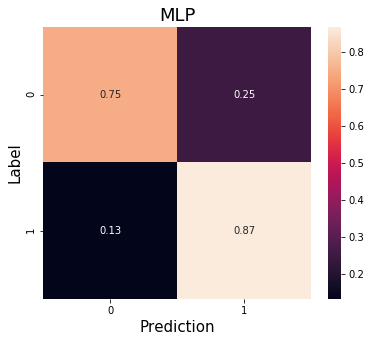

In [24]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_test0, y_pred)
conf_mx


cm = confusion_matrix(y_test0, y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(6,5))

hm = sn.heatmap(cmn, annot=True, fmt='.2f')#, x_label='label')
hm.axes.set_title("MLP",fontsize=18)
hm.set_xlabel('Prediction',fontsize=15)
hm.set_ylabel('Label',fontsize=15)